In [1]:
import geopandas as gpd

import agrigee_lite as agl

Earth Engine initialized successfully using AgriGEE.lite for academic usage (project=ee-mateuspsilva).


In [2]:
gdf = gpd.read_parquet("data/sample.parquet")

In [2]:
gdf = gpd.read_parquet("data/mt_crops.parquet")

In [3]:
gdf["centroid_x"] = gdf.geometry.centroid.x
gdf["centroid_y"] = gdf.geometry.centroid.y

/tmp/ipykernel_979/3423753827.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["centroid_x"] = gdf.geometry.centroid.x
/tmp/ipykernel_979/3423753827.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["centroid_y"] = gdf.geometry.centroid.y


In [4]:
from sklearn.cluster import DBSCAN

In [5]:
dbscan = DBSCAN(eps=1.0, min_samples=1, metric='euclidean')

In [ ]:
gdf["cluster"] = dbscan.fit_predict(gdf[["centroid_x", "centroid_y"]])

In [12]:
gdf.cluster.nunique()

1

<Axes: xlabel='centroid_x', ylabel='centroid_y'>

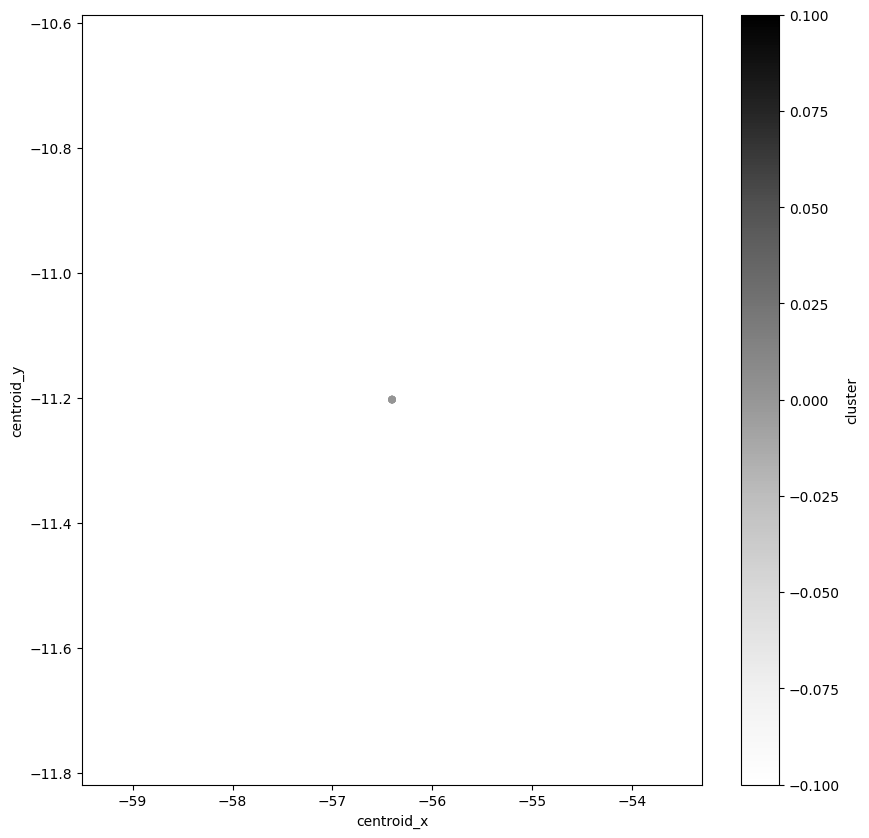

In [11]:
gdf.plot(x="centroid_x", y="centroid_y", kind="scatter", c="cluster", figsize=(10, 10))

In [3]:
palsar_sat = agl.sat.PALSAR2ScanSAR()

In [4]:
agl.get.multiple_sits_gdrive(gdf, palsar_sat)

Waiting for tasks: 100%|██████████| 1/1 [01:06<00:00, 66.93s/it]


KeyboardInterrupt: 

In [ ]:
row = gdf.iloc[0]

palsar_sat = agl.sat.PALSAR2ScanSAR()

agl.vis.sits(row.geometry, "2019-10-01", "2024-10-01", palsar_sat, "hh")

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
row = gdf.iloc[0]

fig, ax = plt.subplots(2, figsize=(24, 2*10))

palsar_sat = agl.sat.PALSAR2ScanSAR(indices=["rvi"])
s2_sat = agl.sat.Sentinel2(bands=["red", "nir"], indices=["evi2"])

agl.vis.sits(row.geometry, "2019-10-01", "2024-10-01", palsar_sat, "rvi", ax=ax[0])
agl.vis.sits(row.geometry, "2019-10-01", "2024-10-01", s2_sat, "evi2", ax=ax[1])

plt.show()

In [ ]:
s2_sat = agl.sat.Sentinel2(use_sr=False)

In [ ]:
gdf = gdf[gdf.start_date >= s2_sat.startDate].reset_index(drop=True)

In [ ]:
task = agl.get.download_multiple_sits_task_asset(gdf, s2_sat, "projects/ee-mateuspsilva/assets/BBB")

In [ ]:
task2 = task.start()